<a href="https://colab.research.google.com/github/Harsha194/Elevate_Labs_Tasks/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix:
[[106   2]
 [  1  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


ROC-AUC Score: 0.998


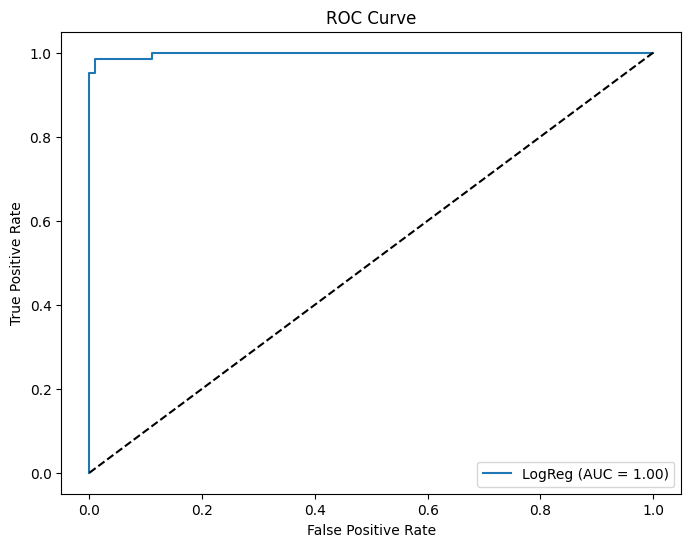

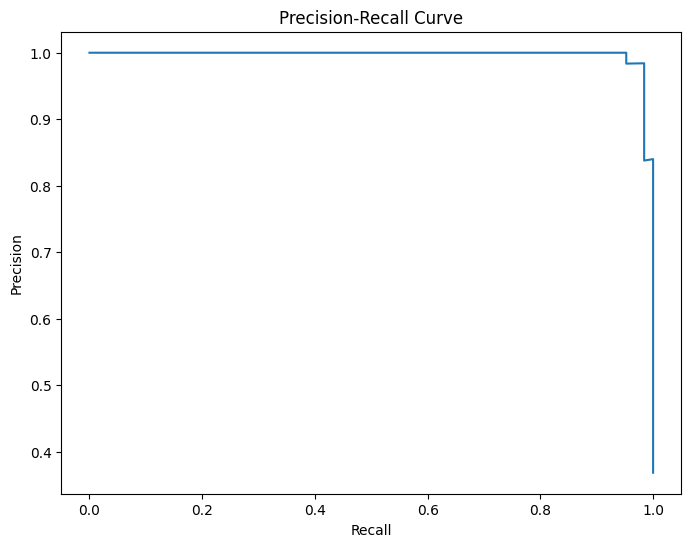


Metrics with threshold 0.4:
Precision: 0.954
Recall: 0.984


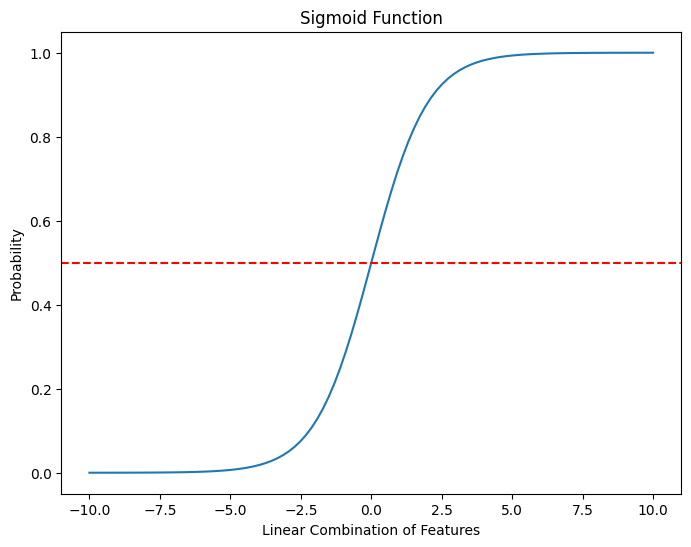

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                            precision_score, recall_score, roc_auc_score,
                            roc_curve, precision_recall_curve)


data = pd.read_csv('data.csv')
data = data.drop(['id', 'Unnamed: 32'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


X = data.drop('diagnosis', axis=1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)


y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


print(f"\nROC-AUC Score: {roc_auc_score(y_test, y_pred_proba):.3f}")
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'LogReg (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
print(f"\nMetrics with threshold {threshold}:")
print(f"Precision: {precision_score(y_test, y_pred_adjusted):.3f}")
print(f"Recall: {recall_score(y_test, y_pred_adjusted):.3f}")


x = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-x))
plt.figure(figsize=(8, 6))
plt.plot(x, sigmoid)
plt.axhline(y=0.5, color='r', linestyle='--')
plt.title('Sigmoid Function')
plt.xlabel('Linear Combination of Features')
plt.ylabel('Probability')
plt.show()